### Importing and set-up

In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%pprint            # to turn off pretty printing

Pretty printing has been turned OFF


In [2]:
balc = pd.DataFrame.from_csv('../data/balc_targets.csv', index_col=[0])
pelic = pd.DataFrame.from_csv('../private/pelic_targets.csv', index_col=[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


### Descriptive

In [3]:
balc.groupby('Level')['token_count', 'Guiraud'].describe()

token_count                                                         \
            count   mean        std    min     25%    50%     75%    max   
Level                                                                      
3            10.0  151.7  64.187313   78.0  102.25  144.0  167.00  264.0   
4            10.0  211.3  41.411351  138.0  185.75  209.0  238.00  286.0   
5            10.0  251.6  70.062195  172.0  188.75  255.0  282.25  397.0   
6            10.0  229.4  40.467271  183.0  200.75  220.5  243.00  303.0   

      Guiraud                                                              \
        count      mean       std       min       25%       50%       75%   
Level                                                                       
3        10.0  6.163016  1.109401  4.858987  5.306816  5.996125  7.194436   
4        10.0  6.811704  1.021188  5.344792  6.127009  6.680361  7.663461   
5        10.0  7.484633  0.928882  6.186455  6.807033  7.507225  7.826307   
6        10.0  8.029801  0.465230  7.529412  7.798222  7.981108  8.169718   

                 
            max  
Level            
3      7.877855  
4      8.455767  
5      8.944468  
6      9.152086

In [4]:
pelic.groupby(['level_id', 'native_language'])['toks_re_len', 'Guiraud'].describe()

toks_re_len                                           \
                               count   mean         std    min     25%    50%   
level_id native_language                                                        
3        Arabic                 10.0  173.0  103.825709   10.0  107.75  167.0   
         Korean                 10.0  171.9   58.856605  100.0  127.50  156.5   
         Spanish                10.0  159.6   78.785503   69.0  116.75  160.0   
4        Arabic                 10.0  205.6  132.624114   13.0   86.75  223.5   
         Korean                 10.0  226.1   98.635637   46.0  169.75  206.5   
         Spanish                10.0  220.5  134.122871   59.0   98.50  189.0   
5        Arabic                 10.0  258.2  128.273839   20.0  160.25  284.5   
         Korean                 10.0  144.5  103.596707   28.0   68.00  140.0   
         Spanish                10.0  290.0  113.430351   33.0  270.75  330.0   

                                        Guiraud                                \
                             75%    max   count      mean       std       min   
level_id native_language                                                        
3        Arabic           208.25  356.0    10.0  6.410718  1.841603  3.162278   
         Korean           207.00  280.0    10.0  6.780253  1.681038  3.502303   
         Spanish          171.00  355.0    10.0  6.093174  0.596275  5.160468   
4        Arabic           309.75  384.0    10.0  7.055018  2.018816  3.605551   
         Korean           319.75  356.0    10.0  7.752922  1.260174  5.602794   
         Spanish          342.50  398.0    10.0  7.435105  1.939005  5.077368   
5        Arabic           370.75  390.0    10.0  7.138747  1.646513  4.248529   
         Korean           180.25  374.0    10.0  6.803422  1.714505  4.274374   
         Spanish          361.50  397.0    10.0  7.891529  1.291962  5.048252   

                                                                   
                               25%       50%       75%        max  
level_id native_language                                           
3        Arabic           4.989269  6.692213  7.795469   9.009982  
         Korean           5.884419  6.769231  7.943260   9.203260  
         Spanish          5.808045  5.964809  6.427172   7.295815  
4        Arabic           5.420555  7.629763  8.064704  10.190197  
         Korean           7.125573  7.798156  8.761087   9.486981  
         Spanish          6.107491  6.931256  9.082138  10.536023  
5        Arabic           5.888579  7.525306  8.581431   8.870455  
         Korean           5.384871  7.081285  7.685704   9.499716  
         Spanish          7.536954  8.304324  8.613962   9.712147

### Visualization

#### BALC

Text(0.5, 1.0, 'Token Count by Level (BALC samples)')

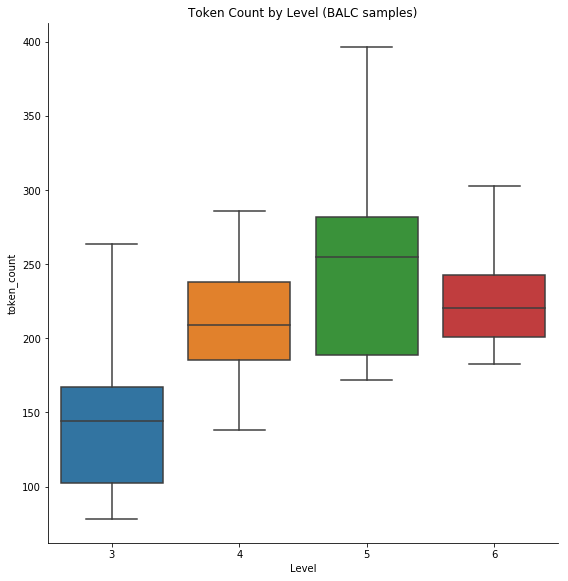

In [5]:
fig = sns.catplot(x='Level', y='token_count', kind='box', data=balc, height=8)
plt.title('Token Count by Level (BALC samples)')
fig.savefig('../images/samples_balc_tokct.png')

Text(0.5, 1.0, "Guiraud's R  by Level (BALC samples)")

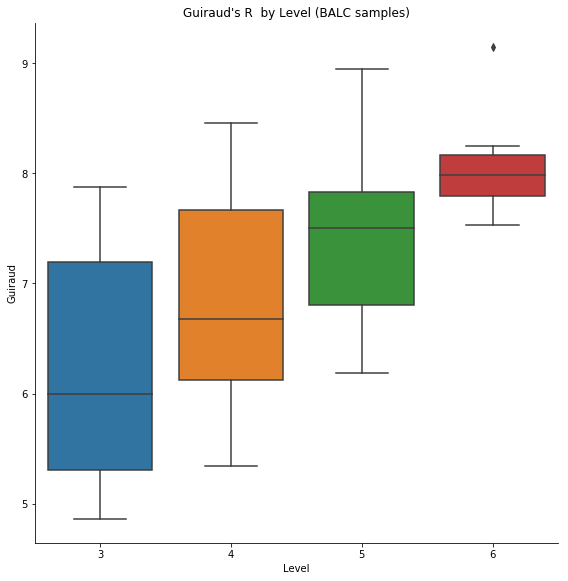

In [6]:
fig = sns.catplot(x='Level', y='Guiraud', kind='box', data=balc, height=8)
plt.title('Guiraud\'s R  by Level (BALC samples)')
fig.savefig('../images/samples_balc_guiraudr.png')

#### PELIC

Text(0.5, 1.0, 'Token Count by Level and L1 (PELIC samples)')

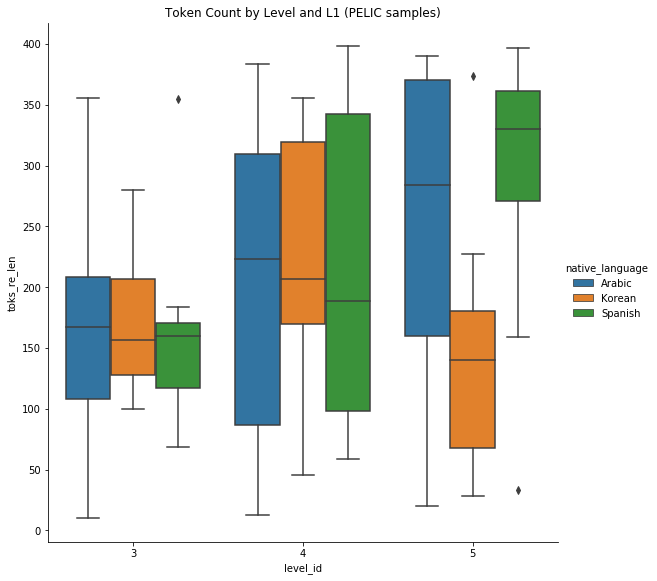

In [7]:
# breaking down by L1
fig = sns.catplot(x='level_id', y='toks_re_len', kind='box', data=pelic, height=8, hue='native_language')
plt.title('Token Count by Level and L1 (PELIC samples)')
fig.savefig('../images/samples_pelic_tokct.png')

Text(0.5, 1.0, "Guiraud's R by Level and L1 (PELIC samples)")

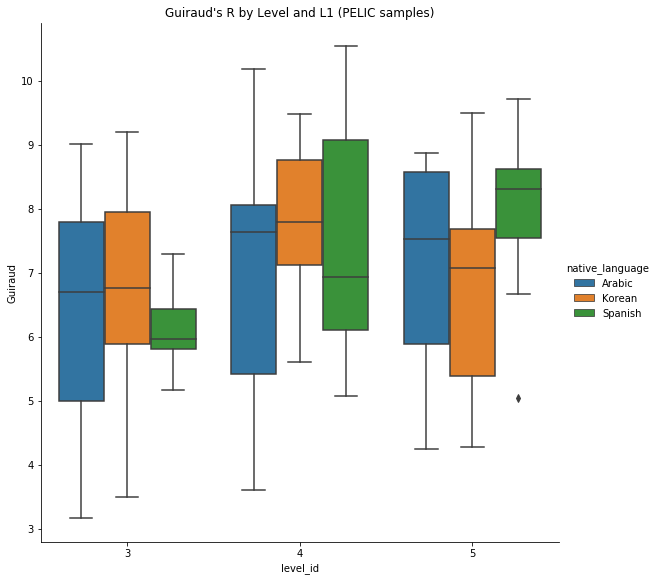

In [8]:
# by level and L1
fig = sns.catplot(x='level_id', y='Guiraud', kind='box', data=pelic, height=8, hue='native_language')
plt.title('Guiraud\'s R by Level and L1 (PELIC samples)')
fig.savefig('../images/samples_pelic_guiraudr.png')